In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler ,LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage , dendrogram, fcluster

In [4]:
data = pd.read_csv('cities_r2.csv')
data.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [5]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [6]:
le = LabelEncoder()
data['name_of_city'] = le.fit_transform(data['name_of_city'])

In [7]:
X = data[['effective_literacy_rate_total']]
scaler = StandardScaler()
xScaled = scaler.fit_transform(X)

In [8]:
Z = linkage(xScaled,method='ward')

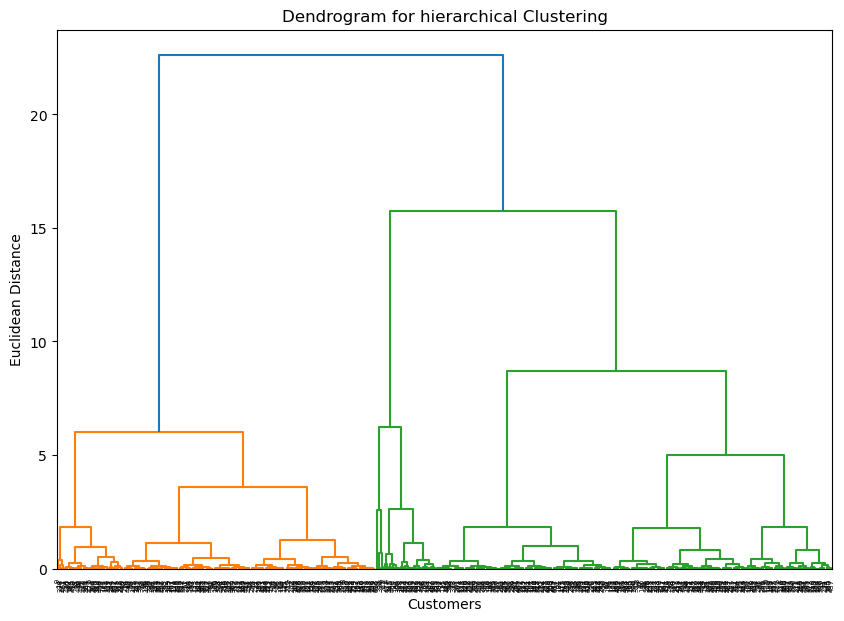

In [9]:
plt.figure(figsize=(10,7))
dendrogram(Z)
plt.title("Dendrogram for hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [10]:
max_distance = 5
clusters = fcluster(Z,max_distance,criterion='distance')
data['Cluster'] = clusters

In [11]:
print(data[['name_of_city','effective_literacy_rate_total','Cluster']].head())
data.groupby('Cluster')['effective_literacy_rate_total'].mean()

   name_of_city  effective_literacy_rate_total  Cluster
0             0                          79.86        7
1             1                          91.99        2
2             2                          80.51        7
3             3                          83.46        6
4             4                          68.38        4


Cluster
1    94.052619
2    89.506770
3    59.648000
4    72.732121
5    85.661429
6    82.323529
7    78.527818
Name: effective_literacy_rate_total, dtype: float64